## Вариант 21 задача 6.5

Определить, как растет средняя длина пути в сети по мере удаления из сети узлов
с наивысшей центральностью. Построить график зависимости средней длины пути от количества
удаленных узлов. Проверять сеть на связность - рассчитывать значения средней длины пути
только для связных сетей. Построить в одной системе координат 4 графика роста средней 
длины пути по мере удаления наиболее центральных узлов в одной и тойже эмпирической сети
(размер сети не менее 100 узлов) в 4х видах центральности: центральность по степени,
центральность по близости, центральность по посредничеству и центральность по собственному вектору.
Построить аналогичные 4 графика для случая,когда значения центральности пересчитываются
заново после каждого шага удаления узла

<i><b>Дисклеймер</b>: эмпирический датасет в самом конце</i>

In [337]:
import networkx as nx
import matplotlib.pyplot as plt
import statistics as stat # модуль для использования статистических функций
import math
import pandas as pd


### используемая функция рассчета средней длинны пути
<b>average_shortest_path_length(G, weighted=False)</b>

The average shortest path length is the sum of path lengths d(u,v) between all pairs of nodes (assuming the length is zero if v is not reachable from v) normalized by n*(n-1) where n is the number of nodes in G.

In [338]:
#на лекции 6 была написана функция для визуализации сетей по центральности 
#воспользуемся ей

# определяем функцию для удобного рисования сети с размером узлов пропорциональной степени центральности
# и подписями узлов в виде значений центральности
# Параметры:
# gr - изображаемый граф
# gr_layout - размещение узлов
# centrality_dict - результат расчета центральности (словарь, где ключ - id узла, значение - величина центральности)
# node_size_scale=1000 - коэффицеинт масштабирования значения центральности для определения размера узла на рисунке 
# draw_labels=True - нужно ли рисовать подиписи
# Возвращаемое значение: нет


def draw_cntr(gr, gr_layout, centrality_dict, 
              node_size_scale=1000, node_color='c', edge_color=0.0, draw_labels=True, **kwargs):
    # создаем список размеров узлов:
    # обходим все узлы сети, для них извлекаем значение центральности и умножаем на масштаб node_size_scale
    nd_size=[node_size_scale * centrality_dict[n] for n in gr.nodes()]
    
    # рисуем граф gr с раположением вершин gr_layout, размером узлов nd_size и бирюзовым цветом 
    nx.draw(gr, pos=gr_layout, node_size=nd_size, node_color=node_color, edge_color=str(edge_color), **kwargs)
    
    if draw_labels: # если параметр draw_labels истина
        # для формирования красивых подписей создаем словарь formated_labels:
        # обходим словарь centrality_dict и форматируем значения до 3х знаков поcле запятой
        fm_labels = {k:'{:0.3f}'.format(l) for k,l in centrality_dict.items()}    
        # рисуем подписи для графа gr с раположением вершин gr_layout, подписями formated_labels и черным цветом 
        labels=nx.draw_networkx_labels(gr, pos=gr_layout, labels=fm_labels, font_color='k') 
        
#функция получения основных характеристик для центральност по сети
def stat_info(vals, to_print=False, to_string=False):
    min_, max_, mean, median = min(vals), max(vals), stat.mean(vals), stat.median(vals)
    if to_print:
        res_str = f'min: {min_:1.3f}, max: {max_:1.3f}, mean: {mean:1.3f}, median: {median:1.3f}'
        if to_string:
            return min_, max_, mean, median, res_str
        else:
            print(res_str)
    return min_, max_, mean, median

        
#функция нормированных значения для каждого узла
def get_net_clr_norm(net, net_centrality):
    net_stat = stat_info(net_centrality.values())
    return [(net_centrality[n]-net_stat[0])/(net_stat[1]-net_stat[0]) for n in net.nodes()]

In [339]:
# удаление узлов с наивысшей центральностью и рассчет пути без динамики
def del_centr(gr,centrality_dict):
    counter = 0#кол-во удаленных узлов
    graph = gr.copy()#для того, чтобы не менять изначальный граф
    #преобразовать словарь в список кортежей
    centrality_list = list(centrality_dict.items())
    #отсортировать его по центральности(по убыванию)
    centrality_list_sorted = sorted(centrality_list,key = lambda x: x[1],reverse = True)
    average_path_length = []
    for i in centrality_list_sorted:
        if nx.is_connected(graph):#проверка графа на связность
            counter+=1
            average_path_length.append((counter,nx.average_shortest_path_length(graph)))
            graph.remove_node(i[0])
    return average_path_length,graph
    

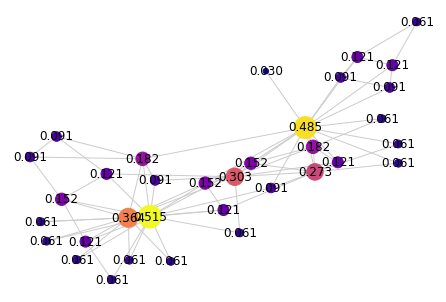

[(1, 2.408199643493761), (2, 2.596590909090909)]


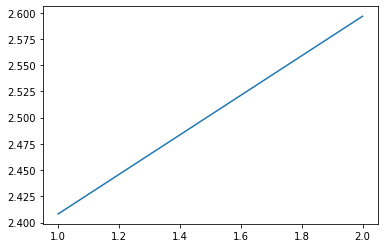

C:\Users\akzho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


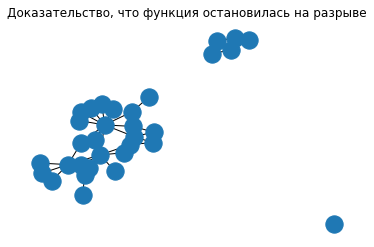

In [340]:
#тест работы на карате клубе
karate_nt = nx.karate_club_graph()
karate_layout = nx.spring_layout(karate_nt, k=1/(karate_nt.number_of_nodes())**0.5, seed=8)
karate_dc = nx.degree_centrality(karate_nt)
draw_cntr(karate_nt,gr_layout = karate_layout,centrality_dict = karate_dc,edge_color = 0.8,
          cmap='plasma',node_color = get_net_clr_norm(karate_nt,karate_dc))
plt.show()
print(del_centr(karate_nt,karate_dc)[0])
data_dc,Gr = del_centr(karate_nt,karate_dc)
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))
plt.show()

plt.title('Доказательство, что функция остановилась на разрыве')
nx.draw(del_centr(karate_nt,karate_dc)[1])#просто показать, что появились разрывы

## Следующий блок может занять 5-8 минут, потому что размер сети порядка 5000

Список кол-ва удаленных узлов и средней длинны пути [(1, 18.989185424445708)]


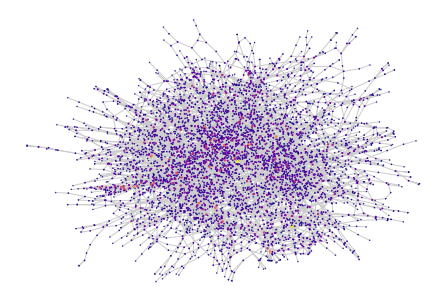

In [341]:
#(на самом деле здесь уже не e-mail а данные о электросетях, прошу прощения, здесь было 5 сетей и ни одна не подошла
email_nt = nx.read_edgelist(r'out.opsahl-powergrid',comments = '%')
email_layout = nx.spring_layout(email_nt, k=1/(email_nt.number_of_nodes())**0.5, seed=8)
email_dc = nx.degree_centrality(email_nt)
draw_cntr(email_nt,gr_layout = email_layout,centrality_dict = email_dc,edge_color = 0.8,
      cmap='plasma',node_color = get_net_clr_norm(email_nt,email_dc),draw_labels = False)
print('Список кол-ва удаленных узлов и средней длинны пути',del_centr(email_nt,email_dc)[0])

### скачивал такую большую сеть, надеялся на много итераций, а после удаления одного центрального узла сеть потеряла связность

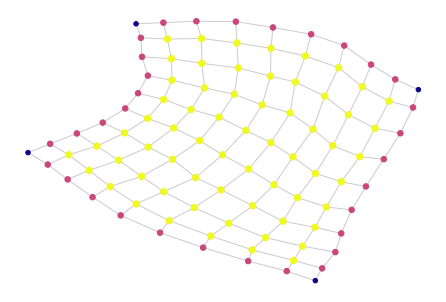

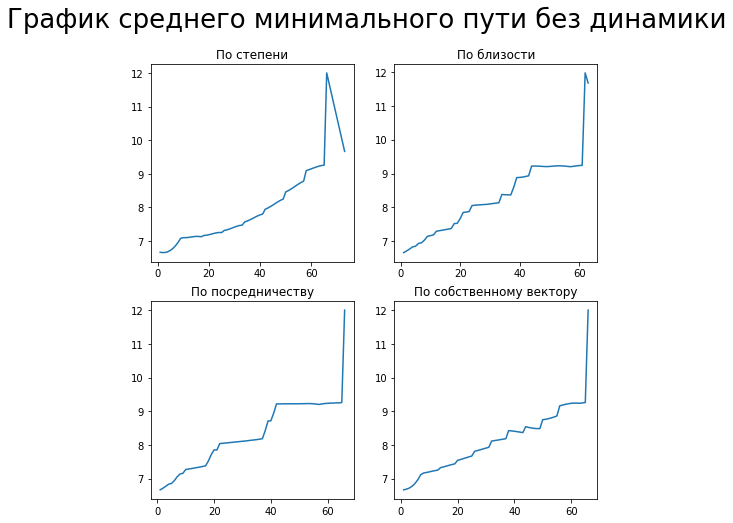

In [342]:
#эмпирические графы представляют 
# определенную сложность в связи с их свяхностью, в примере выше произошло одно удаление и граф перестал быть связным
G = nx.grid_2d_graph(10, 10)
G_layout =nx.spring_layout(G, k=1/(email_nt.number_of_nodes())**0.5, seed=3)
G_dc = nx.degree_centrality(G)
draw_cntr(G,gr_layout = G_layout,centrality_dict = G_dc,edge_color = 0.8,
      cmap='plasma',node_color = get_net_clr_norm(G,G_dc),draw_labels = False)
# print(del_centr(G,G_dc))
plt.plot()

# data = dict(data)

# приступим к графикам
plt.figure(figsize=(8, 8))
plt.suptitle('График среднего минимального пути без динамики',fontsize=26)
plt.subplot(221)
plt.title('По степени')
G_dc = nx.degree_centrality(G)
data_dc = del_centr(G,G_dc)[0]
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))

plt.subplot(222)
plt.title('По близости')
G_cc = nx.closeness_centrality(G)
data_cc = del_centr(G,G_cc)[0]
data_cc = dict(data_cc)
plt.plot(list(data_cc.keys()),list(data_cc.values()))

plt.subplot(223)
plt.title('По посредничеству')
G_bc = nx.betweenness_centrality(G)
data_bc = del_centr(G,G_bc)[0]
data_bc = dict(data_bc)
plt.plot(list(data_bc.keys()),list(data_bc.values()))

plt.subplot(224)
plt.title('По собственному вектору')
G_ec = nx.eigenvector_centrality(G,tol = 0.05)
data_ec = del_centr(G,G_ec)[0]
data_ec = dict(data_ec)
plt.plot(list(data_ec.keys()),list(data_ec.values()))


plt.show()

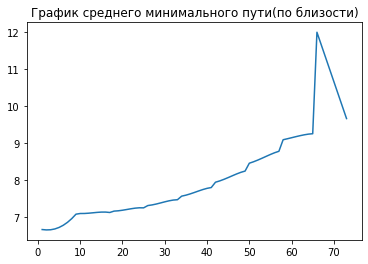

C:\Users\akzho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


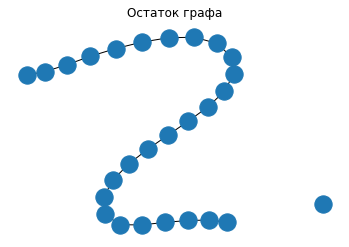

In [343]:
plt.title('График среднего минимального пути(по близости)')
#этот график доказывает, что остановились при появлении разрыва и
#также объясняет странную картину с падением минимального среднего пути
#граф просто стал линией
G_dc = nx.degree_centrality(G)
data_dc,Gr = del_centr(G,G_dc)
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))
plt.show()

plt.title('Остаток графа')
nx.draw(Gr)
plt.show()

In [344]:
# Динамическое удаление узлов с наибольшей центральностью
# после каждого удаление происходит перерасчет значений центральности
def del_centr_dyn(gr,centrality_type):
    counter = 0#кол-во удаленных узлов
    graph = gr.copy()
    average_path_length = []
    while nx.is_connected(graph):#проверка графа на связность
        if centrality_type == nx.eigenvector_centrality:#это появилось из-за
#             сложности с дополнительными параметрами при декорировании
            counter+=1
            centrality_dict = nx.eigenvector_centrality(graph,tol = 0.05)
            centrality_list = list(centrality_dict.items())
            centrality_list_sorted = sorted(centrality_list,key = lambda x: x[1],reverse = True)
            average_path_length.append((counter,nx.average_shortest_path_length(graph)))
            graph.remove_node(centrality_list_sorted[0][0])
        else:
            counter+=1
            centrality_dict = centrality_type(graph)
            centrality_list = list(centrality_dict.items())
            centrality_list_sorted = sorted(centrality_list,key = lambda x: x[1],reverse = True)
            average_path_length.append((counter,nx.average_shortest_path_length(graph)))
            graph.remove_node(centrality_list_sorted[0][0])
    return average_path_length,graph

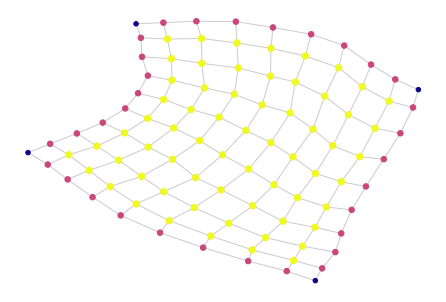

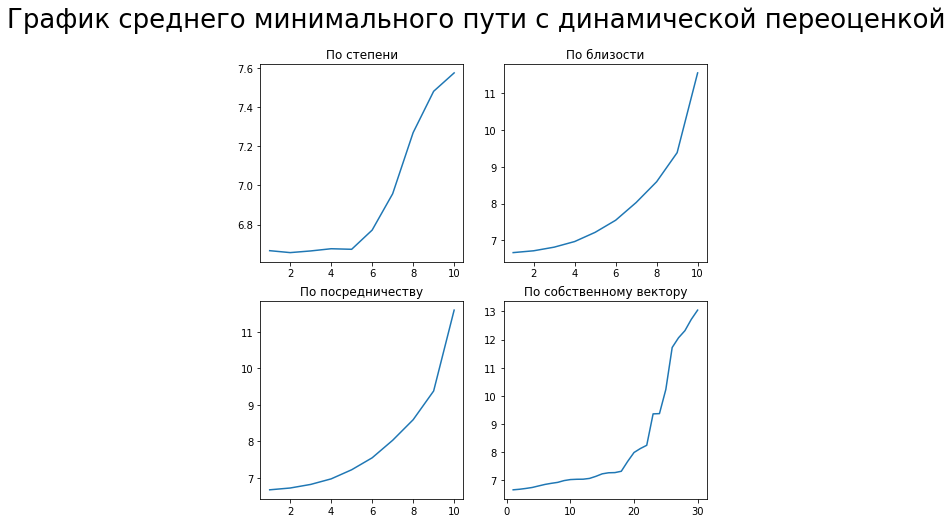

In [345]:
#эмперические графы представляют 
# определенную сложность в связи с их свяхностью, в примере выше произошло одно удаление и граф перестал быть связным
G = nx.grid_2d_graph(10, 10)
G_layout =nx.spring_layout(G, k=1/(email_nt.number_of_nodes())**0.5, seed=3)
G_dc = nx.degree_centrality(G)
draw_cntr(G,gr_layout = G_layout,centrality_dict = G_dc,edge_color = 0.8,
      cmap='plasma',node_color = get_net_clr_norm(G,G_dc),draw_labels = False)
# print(del_centr(G,G_dc))
plt.plot()
data,Gr = del_centr(G,G_dc)
data = dict(data)
data,Gr = del_centr(G,G_dc)
# data = dict(data)

# приступим к графикам
plt.figure(figsize=(8, 8))
plt.suptitle('График среднего минимального пути с динамической переоценкой',fontsize=26)
plt.subplot(221)
plt.title('По степени')
data_dc = del_centr_dyn(G,nx.degree_centrality)[0]
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))


plt.subplot(222)
plt.title('По близости')
data_сc = del_centr_dyn(G,nx.closeness_centrality)[0]
data_сc = dict(data_сc)
plt.plot(list(data_сc.keys()),list(data_сc.values()))


plt.subplot(223)
plt.title('По посредничеству')
data_bc = del_centr_dyn(G,nx.betweenness_centrality)[0]
data_bc = dict(data_bc)
plt.plot(list(data_bc.keys()),list(data_bc.values()))


plt.subplot(224)
plt.title('По собственному вектору')

data_ec = del_centr_dyn(G,nx.eigenvector_centrality)[0]
data_ec = dict(data_ec)
plt.plot(list(data_ec.keys()),list(data_ec.values()))


plt.show()

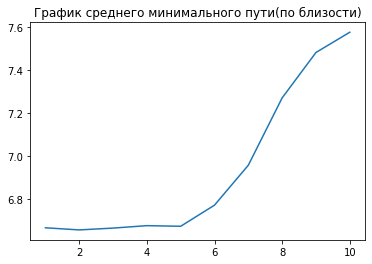

C:\Users\akzho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


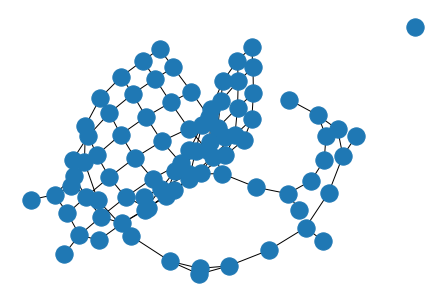

In [346]:
plt.title('График среднего минимального пути(по близости)')
#этот график доказывает, что остановились при появлении разрыва и
#также объясняет странную картину с падением минимального среднего пути
#граф просто стал линией
data_dc,Gr = del_centr_dyn(G,nx.degree_centrality)
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))
plt.show()
nx.draw(Gr)
plt.show()

In [347]:
G = nx.read_edgelist(r'out.arenas-jazz',comments = '%')
print(f'Количество узлов:{G.number_of_nodes()}, Количество ребер:{G.number_of_edges()}')
print('This is the collaboration network between Jazz musicians. Each node is a Jazz musician and an edge denotes\nthat two musicians have played together in a band. The data was collected in 2003.')

Количество узлов:198, Количество ребер:2742
This is the collaboration network between Jazz musicians. Each node is a Jazz musician and an edge denotes
that two musicians have played together in a band. The data was collected in 2003.


In [348]:
print('Спасибо джазовым музыкантам и их единству')

Спасибо джазовым музыкантам и их единству


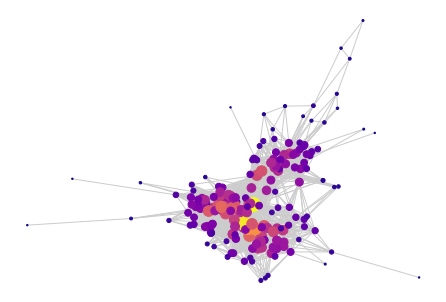

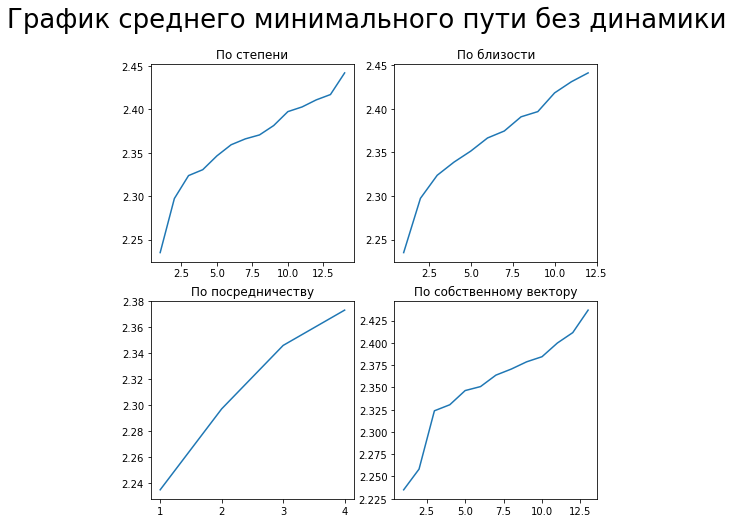

In [349]:
#перед самым концом я нашел датасет, который хорошо связан и позволяет построить графики более чем из 2-ух значений
G = nx.read_edgelist(r'out.arenas-jazz',comments = '%')
G_layout =nx.spring_layout(G, k=1/(email_nt.number_of_nodes())**0.5, seed=3)
G_dc = nx.degree_centrality(G)
draw_cntr(G,node_size_scale=400,gr_layout = G_layout,centrality_dict = G_dc,edge_color = 0.8,
      cmap='plasma',node_color = get_net_clr_norm(G,G_dc),draw_labels = False)
# print(del_centr(G,G_dc))
plt.plot()

# data = dict(data)

# приступим к графикам
plt.figure(figsize=(8, 8))
plt.suptitle('График среднего минимального пути без динамики',fontsize=26)
plt.subplot(221)
plt.title('По степени')
G_dc = nx.degree_centrality(G)
data_dc = del_centr(G,G_dc)[0]
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))

plt.subplot(222)
plt.title('По близости')
G_cc = nx.closeness_centrality(G)
data_cc = del_centr(G,G_cc)[0]
data_cc = dict(data_cc)
plt.plot(list(data_cc.keys()),list(data_cc.values()))

plt.subplot(223)
plt.title('По посредничеству')
G_bc = nx.betweenness_centrality(G)
data_bc = del_centr(G,G_bc)[0]
data_bc = dict(data_bc)
plt.plot(list(data_bc.keys()),list(data_bc.values()))

plt.subplot(224)
plt.title('По собственному вектору')
G_ec = nx.eigenvector_centrality(G,tol = 0.05)
data_ec = del_centr(G,G_ec)[0]
data_ec = dict(data_ec)
plt.plot(list(data_ec.keys()),list(data_ec.values()))


plt.show()

C:\Users\akzho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


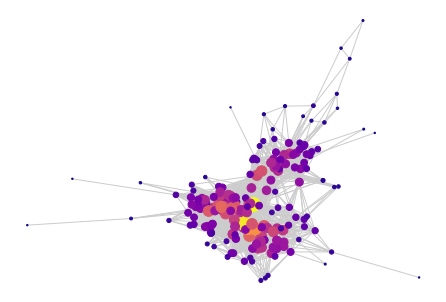

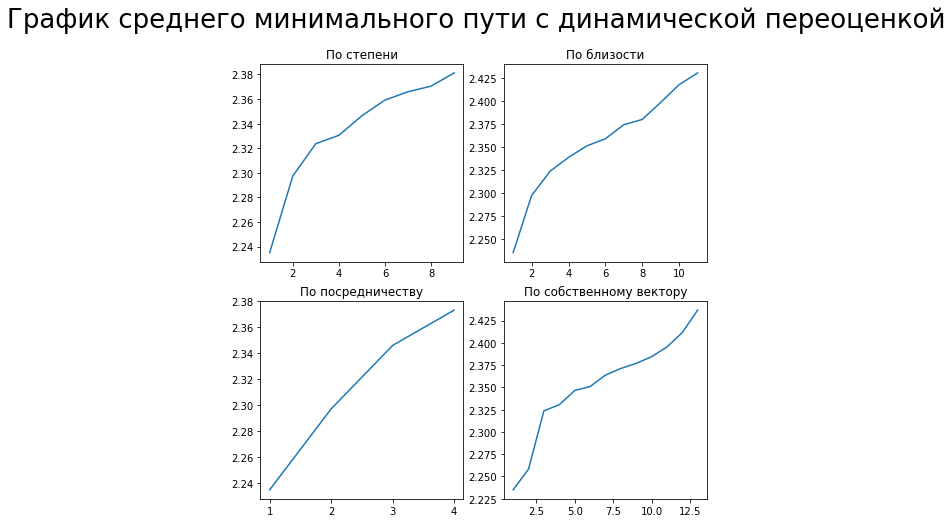

In [350]:
#эмперические графы представляют 
# определенную сложность в связи с их свяхностью, в примере выше произошло одно удаление и граф перестал быть связным
G =nx.read_edgelist(r'out.arenas-jazz',comments = '%')
G_layout =nx.spring_layout(G, k=1/(email_nt.number_of_nodes())**0.5, seed=3)
G_dc = nx.degree_centrality(G)
draw_cntr(G,node_size_scale=400,gr_layout = G_layout,centrality_dict = G_dc,edge_color = 0.8,
      cmap='plasma',node_color = get_net_clr_norm(G,G_dc),draw_labels = False)
# print(del_centr(G,G_dc))
plt.plot()
data,Gr = del_centr(G,G_dc)
data = dict(data)
data,Gr = del_centr(G,G_dc)
# data = dict(data)

# приступим к графикам
plt.figure(figsize=(8, 8))
plt.suptitle('График среднего минимального пути с динамической переоценкой',fontsize=26)
plt.subplot(221)
plt.title('По степени')
data_dc = del_centr_dyn(G,nx.degree_centrality)[0]
data_dc = dict(data_dc)
plt.plot(list(data_dc.keys()),list(data_dc.values()))


plt.subplot(222)
plt.title('По близости')
data_сc = del_centr_dyn(G,nx.closeness_centrality)[0]
data_сc = dict(data_сc)
plt.plot(list(data_сc.keys()),list(data_сc.values()))


plt.subplot(223)
plt.title('По посредничеству')
data_bc = del_centr_dyn(G,nx.betweenness_centrality)[0]
data_bc = dict(data_bc)
plt.plot(list(data_bc.keys()),list(data_bc.values()))


plt.subplot(224)
plt.title('По собственному вектору')

data_ec = del_centr_dyn(G,nx.eigenvector_centrality)[0]
data_ec = dict(data_ec)
plt.plot(list(data_ec.keys()),list(data_ec.values()))


plt.show()